In [1]:
import os
os.environ["STELLARMODELS"] = "../fs255_grid/"

import sys
sys.path.insert(0,'../src/')
import mors

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import numpy as np
import matplotlib.pyplot as plt 


In [2]:
Mstar = 0.82
pctle = 50.0
age   = 600.0
spec_file = "../../input/spec_v-eps-eri.txt"

# Mstar = 1.0
# pctle = 1.0
# age   = 4600.0
# spec_file = "../../input/spec_sun.txt"

In [3]:
modern = mors.spec.Spectrum()
modern.LoadTSV(spec_file)
modern.CalcBandFluxes()
print("From file:",modern.fl_integ)

From file: {'xr': 5.560306506232015, 'e1': 7.9448154085, 'e2': 12.0609833475, 'uv': 19812.444715437763, 'pl': 408738.2618259645, 'bo': 428584.7014739761}


In [4]:
best_pctle, best_age = mors.synthesis.FitModernProperties(modern, Mstar, age)
print(best_pctle, best_age)

19.037036628779422 134.0939999770077


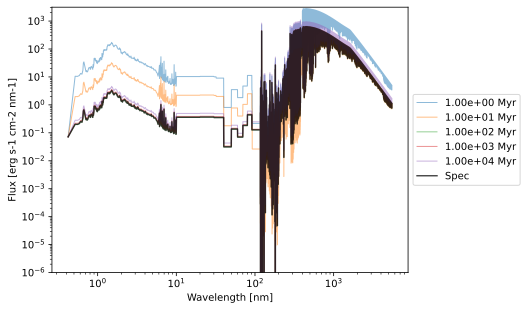

In [5]:
plt.close("all")
fig,ax = plt.subplots(1,1)

for old_age in np.logspace(0, 4, 5):
    props = mors.synthesis.GetProperties(Mstar, best_pctle, best_age)
    synthetic = mors.synthesis.CalcScaledSpectrumFromProps(modern, props, old_age)
    ax.plot(synthetic.wl, synthetic.fl, lw=1, label="%.2e Myr"%old_age, alpha=0.5)

ax.plot(modern.wl, modern.fl, label="Spec", color='black', alpha=0.7)

# Decorate 
ax.set(xscale="log", xlabel="Wavelength [nm]")
ax.set(yscale="log", ylabel="Flux [erg s-1 cm-2 nm-1]")
ax.set_ylim(bottom=1e-6, top=np.amax(modern.fl)*5)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()